In [2]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

In [14]:
N = 100000 #number of samples
sigma = 1
x = np.random.normal(0,sigma,N) #numeri casuali distribuiti secondo una gaussiana
x = np.array(x)
x = x[x>=0]   #prendo solo quelli positivi (integrale tra 0 e infinito)
integral = math.sqrt(2*math.pi)*sigma/(2*len(x))*sum(x**3) #normalizzazione * 1/N * somma(f(x))
print('Numeric integral = ', integral)
print('Analytic integral = ', 2*sigma**4)

Numeric integral =  2.015879231193191
Analytic integral =  2


## How does the error go with the number of samples?

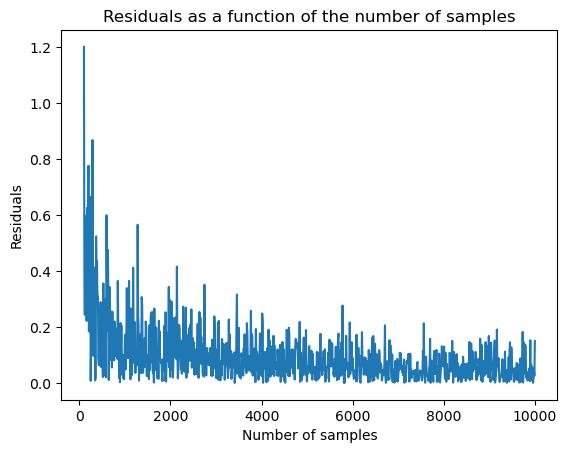

In [146]:
sigma = 1
N = np.linspace(100,10000,1000,dtype=int)  #array che contiene i numeri di sample
integral = []
for i in N:
    x = np.random.normal(0,sigma,i)
    x = np.array(x)
    x = x[x>=0] 
    integral.append(np.absolute(2-math.sqrt(2*math.pi)*sigma/(2*len(x))*sum(x**3)))  #2-integrale = residui
plt.plot(N,integral)
plt.title('Residuals as a function of the number of samples')
plt.xlabel('Number of samples')
plt.ylabel('Residuals')
#plt.ylim(-5,5)
plt.show()

## For a fixed N, how is the result distributed? How does the distribution change if N increases?

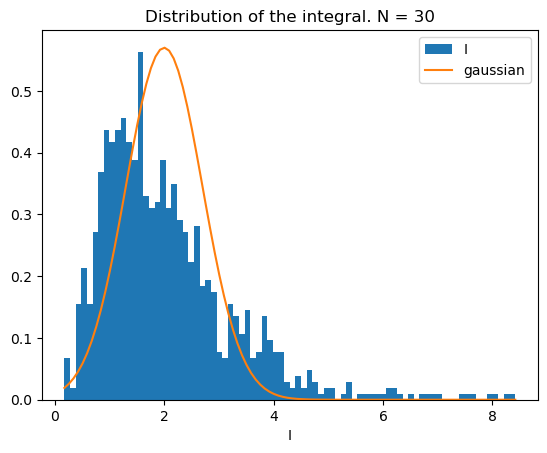

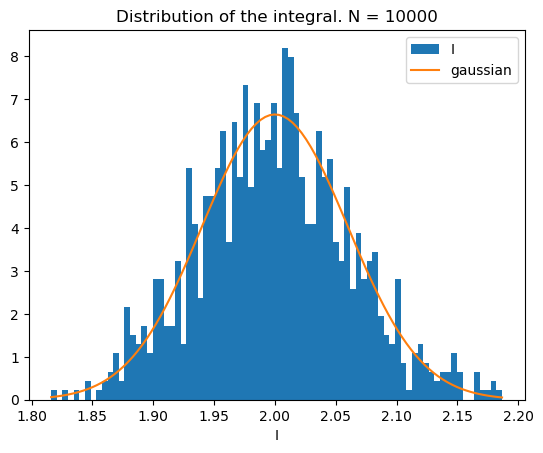

In [28]:
N = 30  #fisso il numero di sample e ripeto l'integrale tante volte
sigma = 1
integral = []
for i in range(1000):
    x = np.random.normal(0,sigma,N)
    x = np.array(x)
    x = x[x>=0] 
    integral.append(math.sqrt(2*math.pi)*sigma/(2*len(x))*sum(x**3))

a,b,c = plt.hist(integral,80,density=True,label='I') #histogram

x_fit = np.linspace(np.min(integral),np.max(integral),100)
plt.plot(x_fit,1/(math.sqrt(2*math.pi)*0.7)*np.exp(-(x_fit-2)**2/(2*0.7**2)),label='gaussian') #gaussian

plt.title('Distribution of the integral. N = '+str(N))
plt.legend()
plt.xlabel('I')
plt.show()

N = 10000  #fisso il numero di sample e ripeto l'integrale tante volte
sigma = 1
integral = []
for i in range(1000):
    x = np.random.normal(0,sigma,N)
    x = np.array(x)
    x = x[x>=0] 
    integral.append(math.sqrt(2*math.pi)*sigma/(2*len(x))*sum(x**3))

a,b,c = plt.hist(integral,80,density=True,label='I') #histogram

x_fit = np.linspace(np.min(integral),np.max(integral),100)
plt.plot(x_fit,1/(math.sqrt(2*math.pi)*0.06)*np.exp(-(x_fit-2)**2/(2*0.06**2)),label='gaussian') #gaussian

plt.title('Distribution of the integral. N = '+str(N))
plt.legend()
plt.xlabel('I')
plt.show()